In [3]:
%load_ext autoreload

%autoreload

import numpy as np
import visualization.array_rendering as ar
import visualization.creature_rendering as cr
import asset_generation.land_creation as lc
import creature_spawning.spawn_creature as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


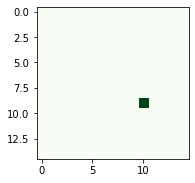

(array([[ 1.        ,  9.        , 10.        ,  3.70730671,  0.        ],
        [ 0.1       ,  0.        ,  0.        , -1.        ,  0.        ]]),
 array([[ 1.        ,  9.        , 10.        ,  3.70730671,  0.        ],
        [ 0.1       ,  9.        , 10.        ,  9.84420607, 10.53601877]]))

In [4]:
world_size = 15
empty_template = np.zeros(shape=(world_size,world_size))

creature2 = sc.generate_random_simple_creature(1)
creature2[0,1] = np.random.randint(2,world_size-2)
creature2[0,2] = np.random.randint(2,world_size-2)
creature2[0,3] = np.random.random_sample() * np.pi * 2

translated_creature = cr.translate_creature_segs_to_world(creature2)

cr.place_creature(empty_template, translated_creature)
ar.render_array(empty_template)

(creature2, translated_creature)